# Random Forest - Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_oversampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31544, 25)
(13520, 25)
(31544,)
(13520,)


In [6]:
# Create Decision Tree classifer object
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy", max_depth=4)

In [7]:
# Train Decision Tree Classifer
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [9]:
accText = 'Random Forest, Oversampled'

In [10]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred) * 100).astype('float64')
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred) * 100).astype('float64')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred) * 100).astype('float64')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred) * 100).astype('float64')
print('F1 score: %f' % f1)

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = '{:2.1f}'.format(accuracy)
acc.at[accText, 'Precision'] = '{:2.1f}'.format(precision)
acc.at[accText, 'Recall'] = '{:2.1f}'.format(recall)
acc.at[accText, 'F1'] = '{:2.1f}'.format(f1)
acc.to_csv("../data/external/accuracies.csv")

Accuracy: 72.455621
Precision: 76.904390
Recall: 64.937729
F1 score: 70.416269


In [11]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[4432 2393]
 [1331 5364]]

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6695
           1       0.77      0.65      0.70      6825

    accuracy                           0.72     13520
   macro avg       0.73      0.73      0.72     13520
weighted avg       0.73      0.72      0.72     13520



In [12]:
features = list(X_train)
#features

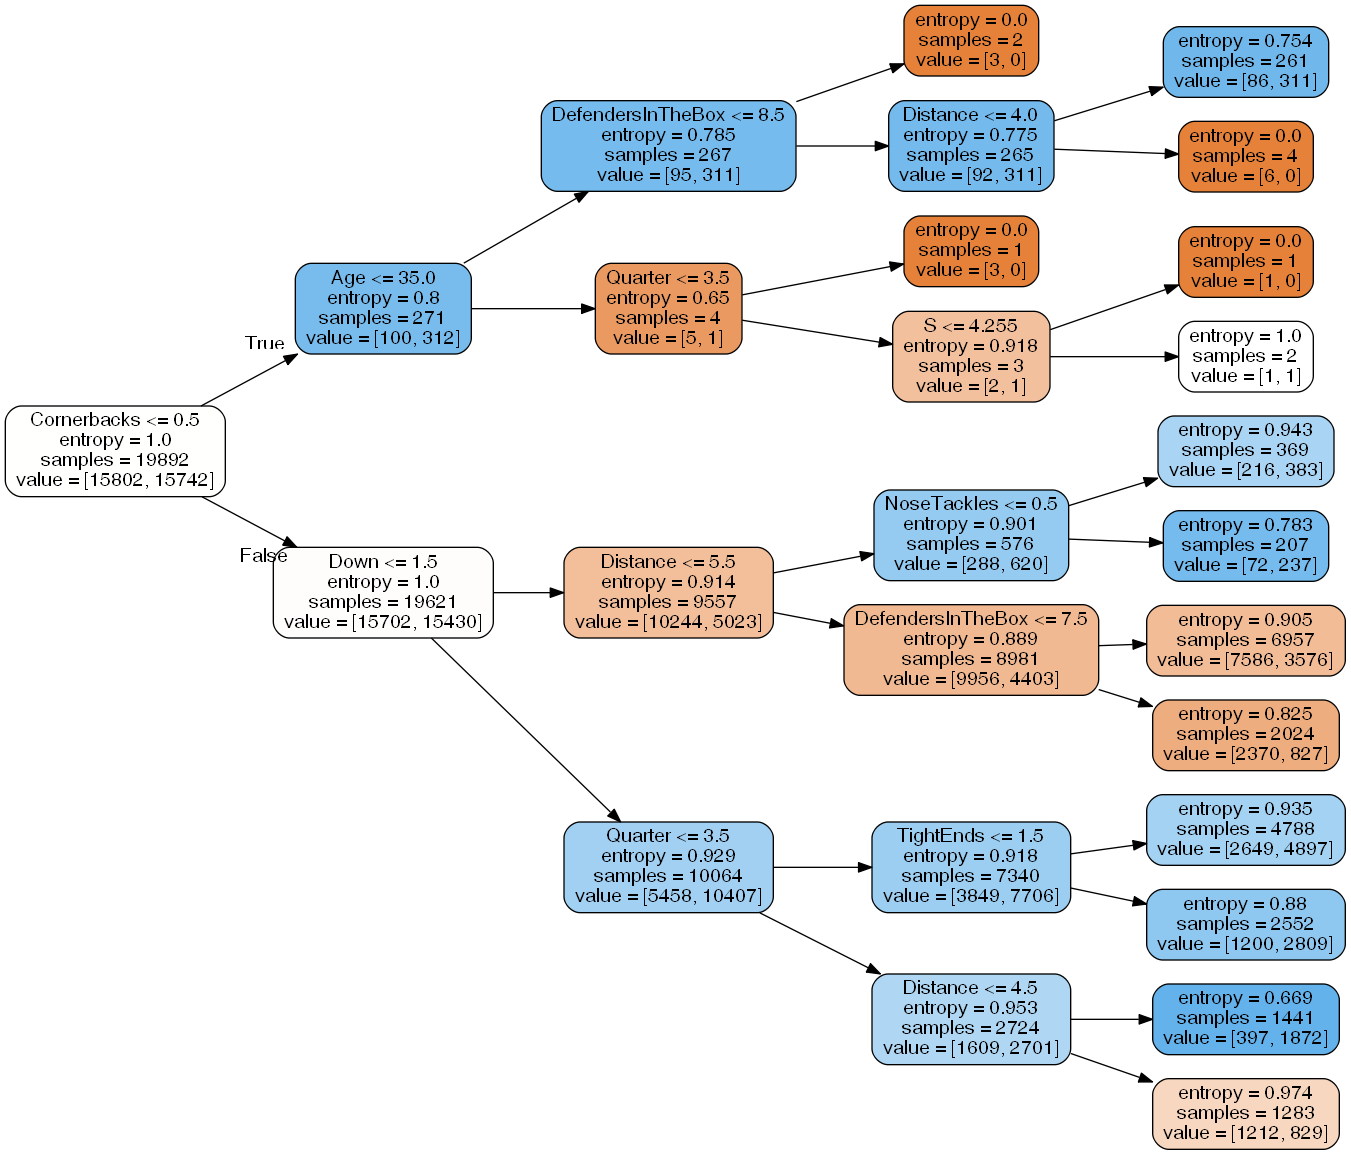

In [13]:
dot_data = StringIO()  
export_graphviz(rfc.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True,rotate=True)

import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png(), width=7860, height=2160)